### Antarctica Global Assignment 
                                                            Made by Abdulabin Lahaji

### Important Dependency

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Load Data

In [2]:
abc=pd.read_csv(r"C:\Users\abdul\Downloads\Atlantic\Data Assignment - Associate ABC.csv")
klm=pd.read_csv(r"C:\Users\abdul\Downloads\Atlantic\Data Assignment - Associlate KLM.csv")
xyz=pd.read_csv(r"C:\Users\abdul\Downloads\Atlantic\Data Assignment - Associate XYZ.csv")

### Explore the Dataset

In [3]:
print("Shape ABC :- ",abc.shape)
print("Shape KLM :- ",klm.shape)
print("Shape XYZ :- ",xyz.shape)

Shape ABC :-  (82, 3)
Shape KLM :-  (124, 3)
Shape XYZ :-  (61, 3)


In [4]:
print(abc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        82 non-null     object 
 1   No of Leads                 48 non-null     float64
 2   Time Spent on LG (in mins)  58 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
None


In [5]:
abc.describe()

,No of Leads,Time Spent on LG (in mins)
count,48.000000,58.000000
mean,6.541667,288.310345
std,4.135772,163.955194
min,0.000000,0.000000
25%,4.000000,300.000000
50%,6.000000,300.000000
75%,10.000000,360.000000
max,15.000000,540.000000


In [6]:
# Renaming Column name
klm.rename(columns={'Time Spent on LG':'Time Spent on LG (in mins)'}, inplace=True)
print(klm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        124 non-null    object 
 1   No of Leads                 110 non-null    float64
 2   Time Spent on LG (in mins)  107 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB
None


In [7]:
klm.describe()

,No of Leads,Time Spent on LG (in mins)
count,110.000000,107.000000
mean,9.736364,384.766355
std,4.355061,99.464090
min,0.000000,180.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,13.000000,450.000000
max,23.000000,540.000000


In [8]:

print(xyz.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        61 non-null     object 
 1   No of Leads                 41 non-null     float64
 2   Time Spent on LG (in mins)  41 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB
None


In [9]:
xyz.describe()

,No of Leads,Time Spent on LG (in mins)
count,41.000000,41.000000
mean,10.853659,387.073171
std,2.555005,82.651192
min,7.000000,180.000000
25%,9.000000,360.000000
50%,10.000000,420.000000
75%,13.000000,420.000000
max,15.000000,600.000000


### Data Cleaning   

#### Check for Duplicate Rows

In [10]:
print(f"There are {abc.duplicated(subset='Date').sum()} Duplicate rows in ABC data")
print(f"There are {klm.duplicated(subset='Date').sum()} Duplicate rows in KLM data")
print(f"There are {xyz.duplicated(subset='Date').sum()} Duplicate rows in XYZ data")

There are 21 Duplicate rows in ABC data
There are 0 Duplicate rows in KLM data
There are 0 Duplicate rows in XYZ data


In [11]:
# Deleting Duplicate Rows from abc dataset
abc=abc.drop_duplicates(subset="Date")
print(f"There are {abc.duplicated(subset='Date').sum()} Duplicate rows in ABC data")

There are 0 Duplicate rows in ABC data


#### Check for Missing Values

In [12]:
print(f"ABC Data\n{abc.isna().sum()}\n")
print(f"KLM Data\n{klm.isna().sum()}\n")
print(f"XYZ Data\n{xyz.isna().sum()}")

ABC Data
Date                           0
No of Leads                   17
Time Spent on LG (in mins)    17
dtype: int64

KLM Data
Date                           0
No of Leads                   14
Time Spent on LG (in mins)    17
dtype: int64

XYZ Data
Date                           0
No of Leads                   20
Time Spent on LG (in mins)    20
dtype: int64


### Data Types Checking

In [13]:
# Converting Date datatype to datetime
abc['Date'] = pd.to_datetime(abc['Date'], format='%d-%m-%Y')
klm['Date'] = pd.to_datetime(klm['Date'], format='%d/%m/%Y')
xyz['Date'] = pd.to_datetime(xyz['Date'], format='%d/%m/%Y')

# # Adding Day Column
abc.insert(1,"Day",abc['Date'].dt.day_name())
klm.insert(1,"Day",klm['Date'].dt.day_name())
xyz.insert(1,"Day",xyz['Date'].dt.day_name())

# Setting Date as Index
abc=abc.set_index("Date")
klm=klm.set_index("Date")
xyz=xyz.set_index("Date")

**Associate ABC**

In [14]:
abc[abc["Time Spent on LG (in mins)"].isnull()]

,Day,No of Leads,Time Spent on LG (in mins)
Date,,,
2023-01-14,Saturday,NaN,NaN
2023-01-15,Sunday,NaN,NaN
2023-01-21,Saturday,NaN,NaN
2023-01-22,Sunday,NaN,NaN
2023-01-28,Saturday,NaN,NaN
2023-01-29,Sunday,NaN,NaN
2023-02-04,Saturday,NaN,NaN
2023-02-05,Sunday,NaN,NaN
2023-02-11,Saturday,NaN,NaN


In [15]:
print("Total Day :-",abc["Time Spent on LG (in mins)"].isnull().count())
print("Leaves taken :-",abc["Time Spent on LG (in mins)"].isnull().sum())
print(abc[abc["Time Spent on LG (in mins)"].isnull()].value_counts("Day"))

Total Day :- 61
Leaves taken :- 17
Day
Saturday    8
Sunday      8
Friday      1
Name: count, dtype: int64


### Leaves taken
**Associate ABC:**
- Total days: 61 days
- Sundays: 8 leaves
- Saturdays: 8 leaves
- Holidays Personal: 1 leaves
- Total leaves taken: 17

**Associate KLM**

In [16]:
klm[klm["Time Spent on LG (in mins)"].isnull()]

,Day,No of Leads,Time Spent on LG (in mins)
Date,,,
2023-01-11,Wednesday,NaN,NaN
2023-01-19,Thursday,NaN,NaN
2023-01-20,Friday,NaN,NaN
2023-01-24,Tuesday,NaN,NaN
2023-01-25,Wednesday,NaN,NaN
2023-01-26,Thursday,NaN,NaN
2023-02-05,Sunday,NaN,NaN
2023-03-11,Saturday,0.0,NaN
2023-03-12,Sunday,0.0,NaN


In [17]:
print("Total Day :-",klm["Time Spent on LG (in mins)"].isnull().count())
print("Leaves taken :-",klm["Time Spent on LG (in mins)"].isnull().sum())
print(klm[klm["Time Spent on LG (in mins)"].isnull()].value_counts("Day"))

Total Day :- 124
Leaves taken :- 17
Day
Thursday     4
Wednesday    4
Monday       3
Sunday       2
Tuesday      2
Friday       1
Saturday     1
Name: count, dtype: int64


### Leaves taken
**Associate KLM:**
- Total days: 124 days
- Sundays: 2 leaves
- Saturdays: 1 leaves
- Holidays Personal: 14 leaves
- Total leaves taken: 17

**Associate XYZ**

In [18]:
xyz[xyz["Time Spent on LG (in mins)"].isnull()]

,Day,No of Leads,Time Spent on LG (in mins)
Date,,,
2023-01-14,Saturday,NaN,NaN
2023-01-15,Sunday,NaN,NaN
2023-01-21,Saturday,NaN,NaN
2023-01-22,Sunday,NaN,NaN
2023-01-23,Monday,NaN,NaN
2023-01-26,Thursday,NaN,NaN
2023-01-28,Saturday,NaN,NaN
2023-01-29,Sunday,NaN,NaN
2023-02-04,Saturday,NaN,NaN


In [19]:
print("Total Day :-",xyz["Time Spent on LG (in mins)"].isnull().count())
print("Leaves taken :-",xyz["Time Spent on LG (in mins)"].isnull().sum())
print(xyz[xyz["Time Spent on LG (in mins)"].isnull()].value_counts("Day"))

Total Day :- 61
Leaves taken :- 20
Day
Saturday    8
Sunday      8
Thursday    2
Monday      1
Tuesday     1
Name: count, dtype: int64


### Leaves taken
**Associate XYZ:**
- Total days: 61 days
- Sundays: 8 leaves
- Saturdays: 8 leaves
- Holidays Personal: 4 leaves
- Total leaves taken: 20

#### Removing Null Values

In [20]:
# Missing dates imply no data captured hence can be removed
abc.dropna(inplace=True)
klm.dropna(inplace=True)
xyz.dropna(inplace=True)

In [21]:
# Checking Null Values
print(f"ABC Data\n{abc.isna().sum()}\n")
print(f"KLM Data\n{klm.isna().sum()}\n")
print(f"XYZ Data\n{xyz.isna().sum()}")

ABC Data
Day                           0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

KLM Data
Day                           0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64

XYZ Data
Day                           0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64


#### Checking outliers

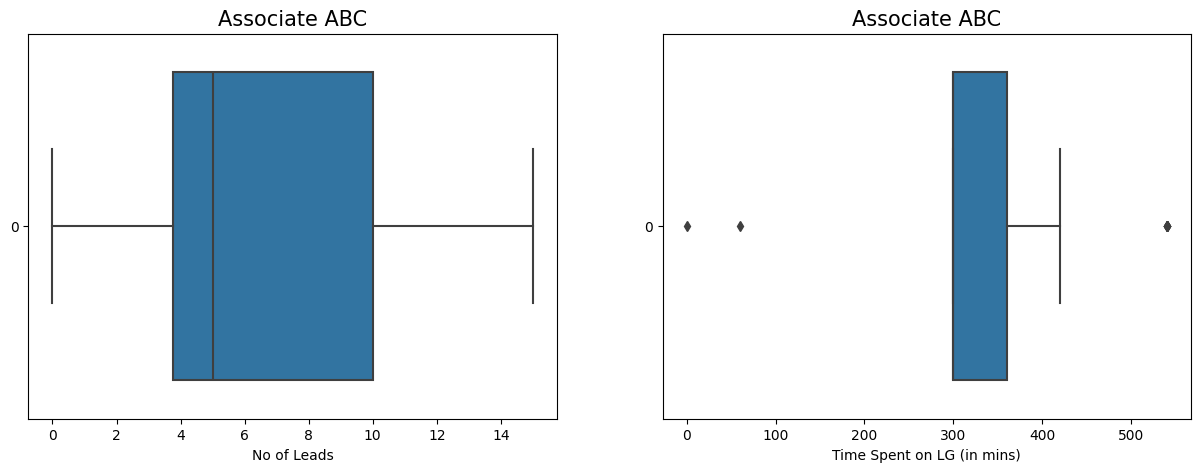

In [22]:
# Associate ABC
plt.figure(figsize=(15,5))

# No of Leads
plt.subplot(1,2,1)
sns.boxplot(abc["No of Leads"],orient="h")
plt.xlabel("No of Leads")
plt.title("Associate ABC",fontsize=15)
# Time Spent on LG (in mins)
plt.subplot(1,2,2)
sns.boxplot(abc["Time Spent on LG (in mins)"],orient="h")
plt.xlabel("Time Spent on LG (in mins)")
plt.title("Associate ABC",fontsize=15)
plt.show()

#### Associate ABC
**From above Box plot we can interpret that** 
- No of leads column has no outliers
- Time Spent on LG (in mins) column contains some Outliers 


In [23]:
# Cap the outliers by replacing values above the percentile with the cutoff value
# Top Capping
toppercentile = 99
topcutoff_value = np.percentile(abc['Time Spent on LG (in mins)'], toppercentile)
abc['Time Spent on LG (in mins)'] = np.where(abc['Time Spent on LG (in mins)'] > topcutoff_value, topcutoff_value, abc['Time Spent on LG (in mins)'])
# Bottom Capping
botpercentile = 2
botcutoff_value = np.percentile(abc['Time Spent on LG (in mins)'], botpercentile)
abc['Time Spent on LG (in mins)'] = np.where(abc['Time Spent on LG (in mins)'] < botcutoff_value, botcutoff_value, abc['Time Spent on LG (in mins)'])
print(f"Top Capping Cutoff :- {topcutoff_value}")
print(f"Bottom Capping Cutoff :- {botcutoff_value}")

Top Capping Cutoff :- 540.0
Bottom Capping Cutoff :- 51.6


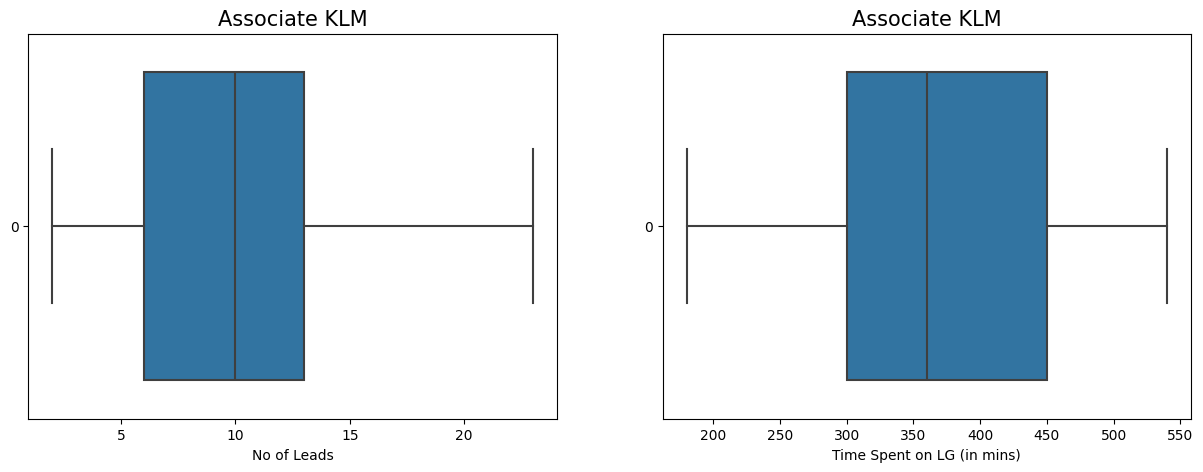

In [24]:
# Associate KLM
plt.figure(figsize=(15,5))

# No of Leads
plt.subplot(1,2,1)
sns.boxplot(klm["No of Leads"],orient="h")
plt.xlabel("No of Leads")
plt.title("Associate KLM",fontsize=15)
# Time Spent on LG (in mins)
plt.subplot(1,2,2)
sns.boxplot(klm["Time Spent on LG (in mins)"],orient="h")
plt.xlabel("Time Spent on LG (in mins)")
plt.title("Associate KLM",fontsize=15)
plt.show()

#### Associate KLM
**From above Box plot we can interpret that** 
- No of Leads column has Outliers present in data

In [25]:
# Cap the outliers by replacing values above the percentile with the cutoff value
# Top Capping
toppercentile = 99
topcutoff_value = np.percentile(klm['No of Leads'], toppercentile)
klm['No of Leads'] = np.where(klm['No of Leads'] > topcutoff_value, topcutoff_value, klm['No of Leads'])
print(f"Top Capping Cutoff :- {topcutoff_value}")

Top Capping Cutoff :- 16.0


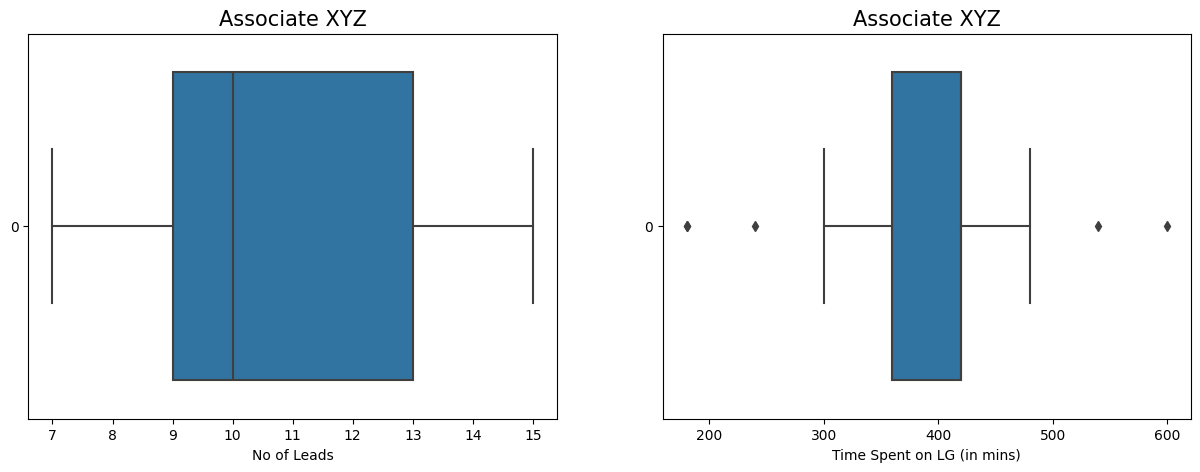

In [26]:
# Associate KLM
plt.figure(figsize=(15,5))

# No of Leads
plt.subplot(1,2,1)
sns.boxplot(xyz["No of Leads"],orient="h")
plt.xlabel("No of Leads")
plt.title("Associate XYZ",fontsize=15)
# Time Spent on LG (in mins)
plt.subplot(1,2,2)
sns.boxplot(xyz["Time Spent on LG (in mins)"],orient="h")
plt.xlabel("Time Spent on LG (in mins)")
plt.title("Associate XYZ",fontsize=15)
plt.show()

#### Associate XYZ
**From above Box plot we can interpret that** 
- No of leads column has no outliers
- Time Spent on LG (in mins) column contains some Outliers 


In [27]:
# Cap the outliers by replacing values above the percentile with the cutoff value
# Top Capping
toppercentile = 99
topcutoff_value = np.percentile(xyz['Time Spent on LG (in mins)'], toppercentile)
xyz['Time Spent on LG (in mins)'] = np.where(xyz['Time Spent on LG (in mins)'] > topcutoff_value, topcutoff_value, xyz['Time Spent on LG (in mins)'])
# Bottom Capping
botpercentile = 2
botcutoff_value = np.percentile(xyz['Time Spent on LG (in mins)'], botpercentile)
xyz['Time Spent on LG (in mins)'] = np.where(xyz['Time Spent on LG (in mins)'] < botcutoff_value, botcutoff_value, xyz['Time Spent on LG (in mins)'])
print(f"Top Capping Cutoff :- {topcutoff_value}")
print(f"Bottom Capping Cutoff :- {botcutoff_value}")

Top Capping Cutoff :- 576.0000000000001
Bottom Capping Cutoff :- 180.0


### Summary of the dataset statistics and initial observations.

**Associate ABC**

In [28]:
abc[["No of Leads","Time Spent on LG (in mins)"]].agg(["count","mean","min","max","median","sum","std"])

,No of Leads,Time Spent on LG (in mins)
count,44.000000,44.000000
mean,6.409091,340.036364
min,0.000000,51.600000
max,15.000000,540.000000
median,5.000000,300.000000
sum,282.000000,14961.600000
std,4.277133,107.408642


**Initial Observations**

- On average 6 leads are generated per day
- Average time spent per day is 340 minutes ≈ 6 hours 
- Consistency calculated using standard deviation of daily leads is 4.27 lower more consistent
- Number of leads vary from day to day with some days having 0 leads while some having as high as 15 

**Associate KLM**

In [29]:
klm[["No of Leads","Time Spent on LG (in mins)"]].agg(["count","mean","min","max","median","sum","std"])

,No of Leads,Time Spent on LG (in mins)
count,107.000000,107.000000
mean,9.785047,384.766355
min,2.000000,180.000000
max,16.000000,540.000000
median,10.000000,360.000000
sum,1047.000000,41170.000000
std,3.990621,99.464090


**Initial Observations**
- On average 9 leads are generated per day
- Average time spent per day is 384 minutes ≈ 6.4 hours 
- Consistency calculated using standard deviation of daily leads is 4.14 lower more consistent
- Number of leads vary from day to day with some days having 2 leads while some having as high as 16 

**Associate XYZ**

In [30]:
xyz[["No of Leads","Time Spent on LG (in mins)"]].agg(["count","mean","min","max","median","sum","std"])

,No of Leads,Time Spent on LG (in mins)
count,41.000000,41.000000
mean,10.853659,386.487805
min,7.000000,180.000000
max,15.000000,576.000000
median,10.000000,420.000000
sum,445.000000,15846.000000
std,2.555005,81.177313


**Initial Observations**

- On average 10 leads are generated per day
- Average time spent per day is 386 minutes ≈ 6.43 hours 
- Consistency calculated using standard deviation of daily leads is 2.55 lower more consistent
- Number of leads vary from day to day with some days having 0 leads while some having as high as 15 

### Data Exploration

**Key performance indicators (KPIs) for each employee**

In [31]:
# 1.Average Leads Generated per day
print(f"Average Leads Generated per day by Associate ABC : - {round(abc['No of Leads'].mean(),2)}")
print(f"Average Leads Generated per day by Associate KLM : - {round(klm['No of Leads'].mean(),2)}")
print(f"Average Leads Generated per day by Associate XYZ : - {round(xyz['No of Leads'].mean(),2)}")

Average Leads Generated per day by Associate ABC : - 6.41
Average Leads Generated per day by Associate KLM : - 9.79
Average Leads Generated per day by Associate XYZ : - 10.85


In [32]:
# 2.Average Time Spent per day.
print(f"Average Time Spent per day by Associate ABC : - {round(abc['Time Spent on LG (in mins)'].mean(),2)}")
print(f"Average Time Spent per day by Associate KLM : - {round(klm['Time Spent on LG (in mins)'].mean(),2)}")
print(f"Average Time Spent per day by Associate XYZ : - {round(xyz['Time Spent on LG (in mins)'].mean(),2)}")

Average Time Spent per day by Associate ABC : - 340.04
Average Time Spent per day by Associate KLM : - 384.77
Average Time Spent per day by Associate XYZ : - 386.49


In [33]:
# 3.Conversion Rate (Leads Generated per hour).
# Leads Generated per Hour 
abc_leads_per_hour = round(abc['No of Leads'].sum()/(abc['Time Spent on LG (in mins)'].sum()/60),2)
klm_leads_per_hour = round(klm['No of Leads'].sum()/(klm['Time Spent on LG (in mins)'].sum()/60),2)
xyz_leads_per_hour = round(xyz['No of Leads'].sum()/(xyz['Time Spent on LG (in mins)'].sum()/60),2)
print(f"Leads Generated per Hour by Associate ABC : - {abc_leads_per_hour}")
print(f"Leads Generated per Hour by Associate KLM : - {klm_leads_per_hour}")
print(f"Leads Generated per Hour by Associate XYZ : - {xyz_leads_per_hour}")

Leads Generated per Hour by Associate ABC : - 1.13
Leads Generated per Hour by Associate KLM : - 1.53
Leads Generated per Hour by Associate XYZ : - 1.68


In [34]:
# 4.Consistency Analysis
print("Consistency Metrics:")
print(f"Consistency in Leads Generated per day by Associate ABC : - {round(abc['No of Leads'].std(),2)}")
print(f"Consistency in Leads Generated per day by Associate KLM : - {round(klm['No of Leads'].std(),2)}")
print(f"Consistency in Leads Generated per day by Associate XYZ : - {round(xyz['No of Leads'].std(),2)}")
print("The Lower the value, the more consistent Associate ")

Consistency Metrics:
Consistency in Leads Generated per day by Associate ABC : - 4.28
Consistency in Leads Generated per day by Associate KLM : - 3.99
Consistency in Leads Generated per day by Associate XYZ : - 2.56
The Lower the value, the more consistent Associate 


### Data Analysis and Visualization

Create visualizations (e.g., line charts) to show the trend of employee performance over time.

Identify any patterns or trends in leads generated and time spent. Create tentative projections for Next Month: This could involve predicting the expected leads generated and time spent for each employee .Present these projections in a clear and understandable format, possibly using a chart or table.



### **Associate ABC**

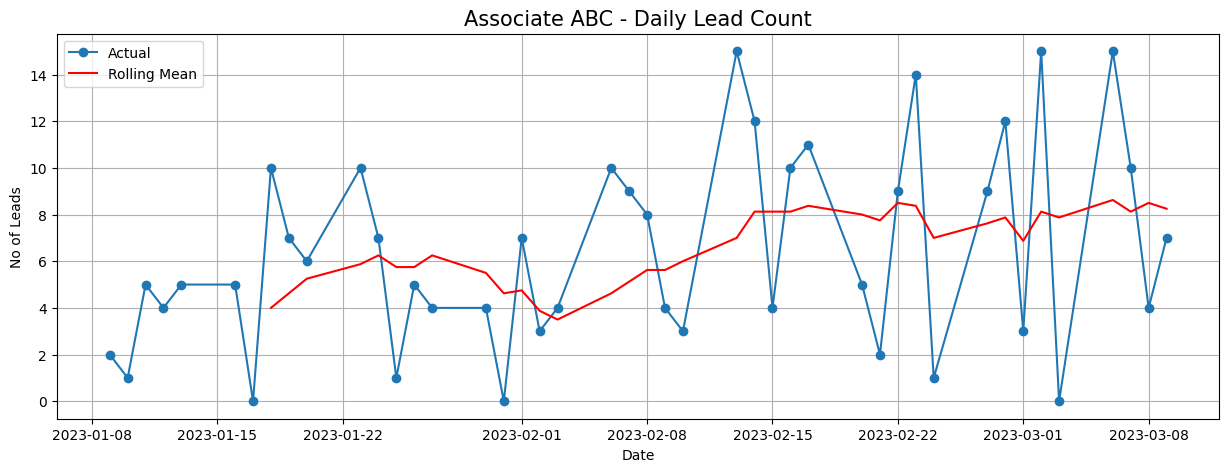

In [35]:
# *Number of Leads Generated Trend and Pattern*
plt.figure(figsize=(15,5))
roll_mean = abc['No of Leads'].rolling(window=8).mean()
plt.plot(abc["No of Leads"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate ABC - Daily Lead Count',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

**Observations:**
- Number of leads generated per day varies significantly, range from 0 to 15. 
**Potential Patterns:**
- Leads tend to peak around second-month. 
- There was an increase in the number of leads generated during the second month compared to the first month.

- In summary, no strong linear time bound trends. 

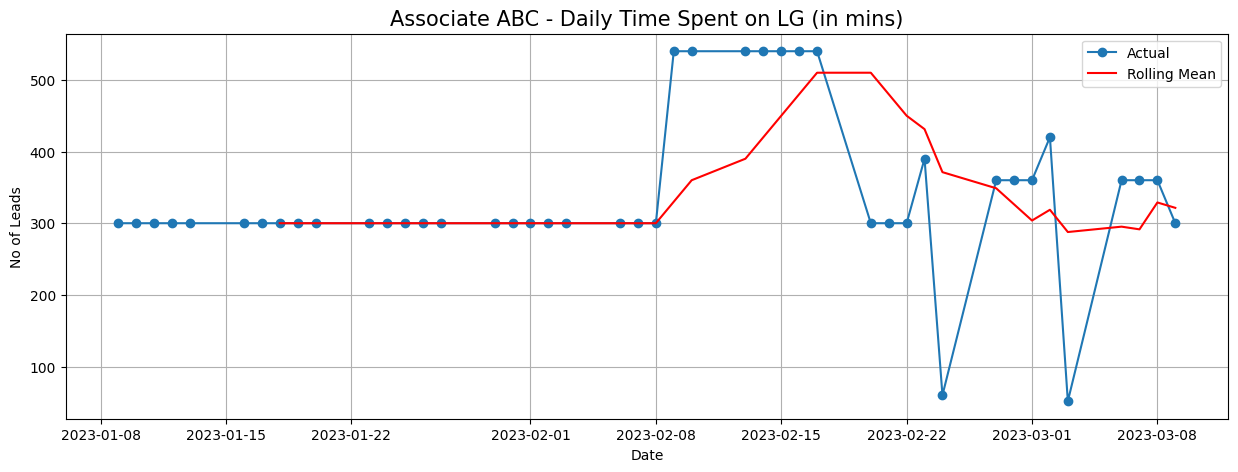

In [36]:
# Time Spent on LG (in mins)
# No of Leads
plt.figure(figsize=(15,5))
roll_mean = abc['Time Spent on LG (in mins)'].rolling(window=8).mean()
plt.plot(abc["Time Spent on LG (in mins)"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate ABC - Daily Time Spent on LG (in mins)',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

##### **Observations:**
- Number of Daily Time Spent on LG (in mins) per day varies significantly, range from 50 to 550.
##### **Potential Patterns:**
- Time spent tend to peak around second-month. 
- There was an increase in the number of Time Spent during the second month compared to the first month.

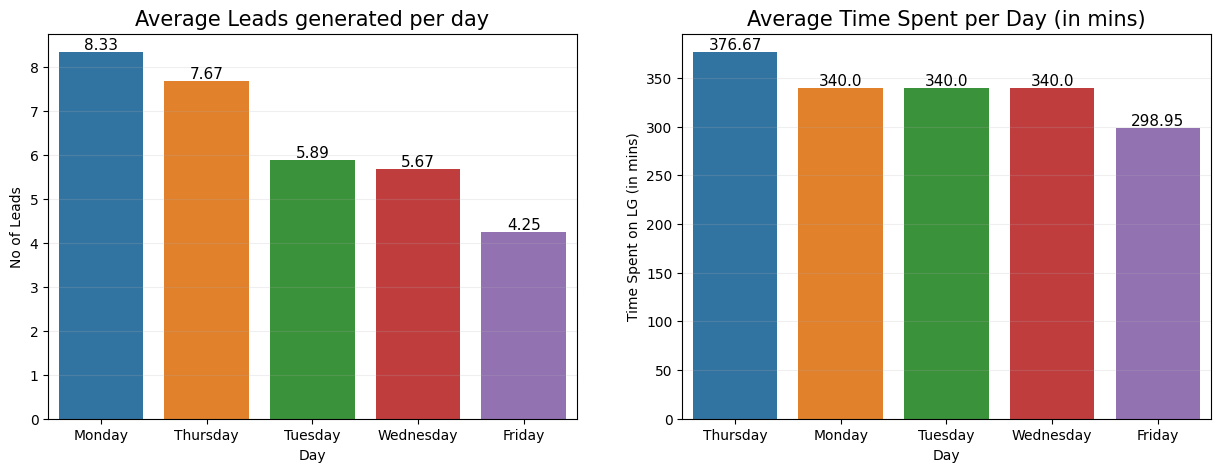

In [37]:
plt.figure(figsize=(15,5))
# Lead Generated
plt.subplot(1,2,1)
avglead=abc.groupby(by="Day",as_index=False)["No of Leads"].mean()
avglead=avglead.sort_values(by="No of Leads",ascending=False)
ax = sns.barplot(y=avglead["No of Leads"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Leads generated per day',fontsize=15)
plt.grid(alpha=0.2,axis="y")
# Time Spent
plt.subplot(1,2,2)
avglead=abc.groupby(by="Day",as_index=False)["Time Spent on LG (in mins)"].mean()
avglead=avglead.sort_values(by="Time Spent on LG (in mins)",ascending=False)
ax = sns.barplot(y=avglead["Time Spent on LG (in mins)"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Time Spent per Day (in mins)',fontsize=15); 
plt.grid(alpha=0.2,axis="y")
plt.show()

##### **Average Leads generated per day**
##### Observations:
- Mondays start strong with an average of 8.33 leads generated, showing a robust beginning to the week.
- Thursdays maintain consistency with an average of 7.67 leads, indicating steady performance.
- Tuesdays & Wednesday follow with a moderate average of 5.67 leads, suggesting a slightly lower but consistent output.
- Fridays conclude the week with a dip in productivity, averaging approximately 4.25 leads.
##### Potential Patterns and Trends:
- This trend illustrates a gradual decline in productivity throughout the week, with Mondays being the most productive and Fridays showing the least output.

##### **Average time spent  per day**
##### Observations:
- Thursday maintains a consistently high time spent, averaging 376 minutes, showcasing dedicated efforts.
- Monday,Tuesday, Wednesday, and Thursday record identical time averages of 340 minutes, indicating consistent efforts across these days.
Fridays witness a decrease in time spent, averaging around 298 minutes, suggesting a slightly reduced focus towards the end of the week.
##### Potential Patterns and Trends:
- This trend illustrates a gradual decline in productivity throughout the week, with Mondays being the most productive and Fridays showing the least output.

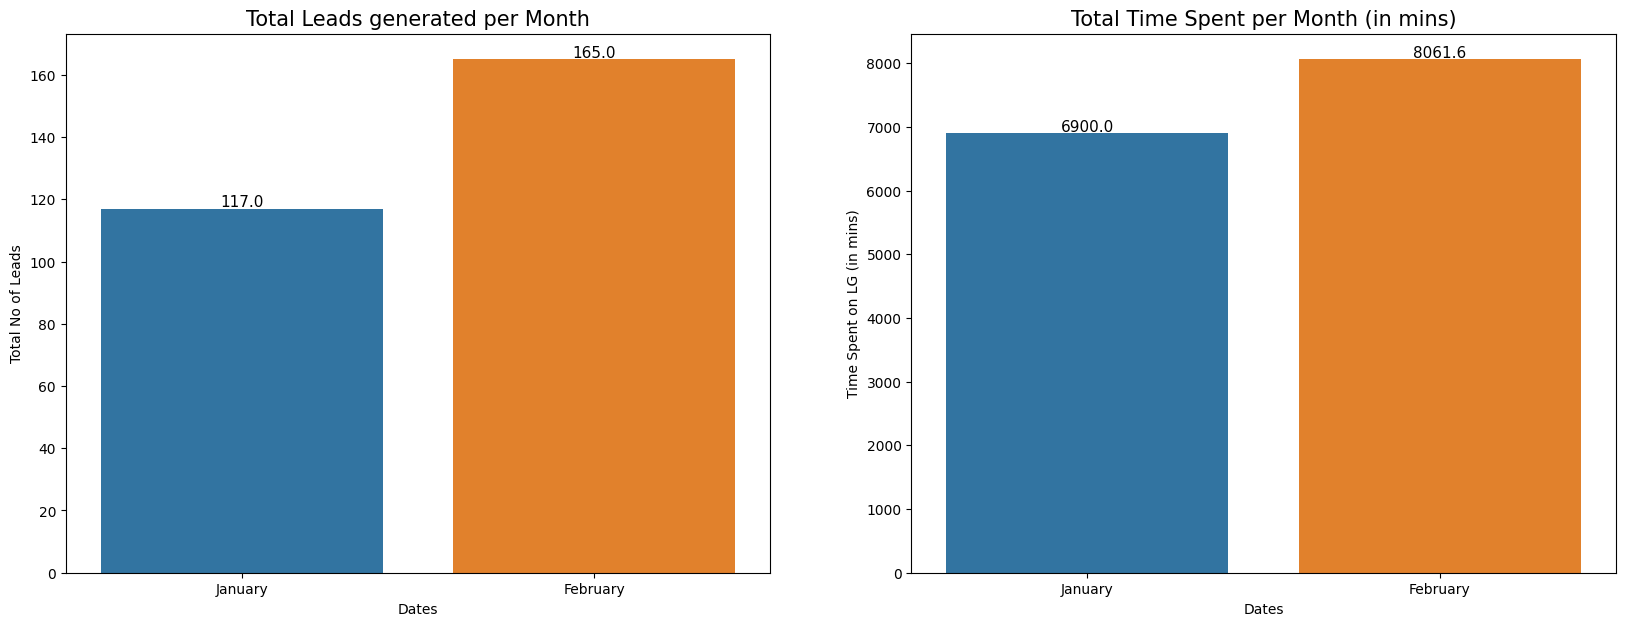

In [38]:

plt.figure(figsize=(20,7))
# Plot1
totmonth1 = abc.loc[:"2023-02-08","No of Leads"].sum()
totmonth2 = abc.loc["2023-02-09":,"No of Leads"].sum()
plt.subplot(1,2,1)
ax = sns.barplot(x=["January" ,"February"],y=[totmonth1,totmonth2])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("Total No of Leads");
plt.title("Total Leads generated per Month",fontsize=15)

# Time Spent on LG (in mins)
plt.subplot(1,2,2)
totmonth1 = abc.loc[:"2023-02-08","Time Spent on LG (in mins)"].sum()
totmonth2 = abc.loc["2023-02-09":,"Time Spent on LG (in mins)"].sum()
ax = sns.barplot(x=["January" ,"February"],y=[totmonth1,totmonth2])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("Time Spent on LG (in mins)")
plt.title("Total Time Spent per Month (in mins)",fontsize=15)
plt.show()

#### Observations:

##### Leads Generated: 
January recorded a total of 117 leads, while February witnessed an increase to 165 leads, indicating a positive upward trend in lead generation between the two months.

##### Time Spent: 
The total time spent on lead generation in January summed up to 6900 minutes, which saw a rise to 8061 minutes in February. This increase reflects a growing investment of time in lead generation activities in February compared to January.\
**These observations suggest a consistent growth trend in both leads generated and time spent, highlighting an upward trajectory in productivity and effort from January to February.**

### **Associate XYZ**

*Number of Leads Generated Trend and Pattern*

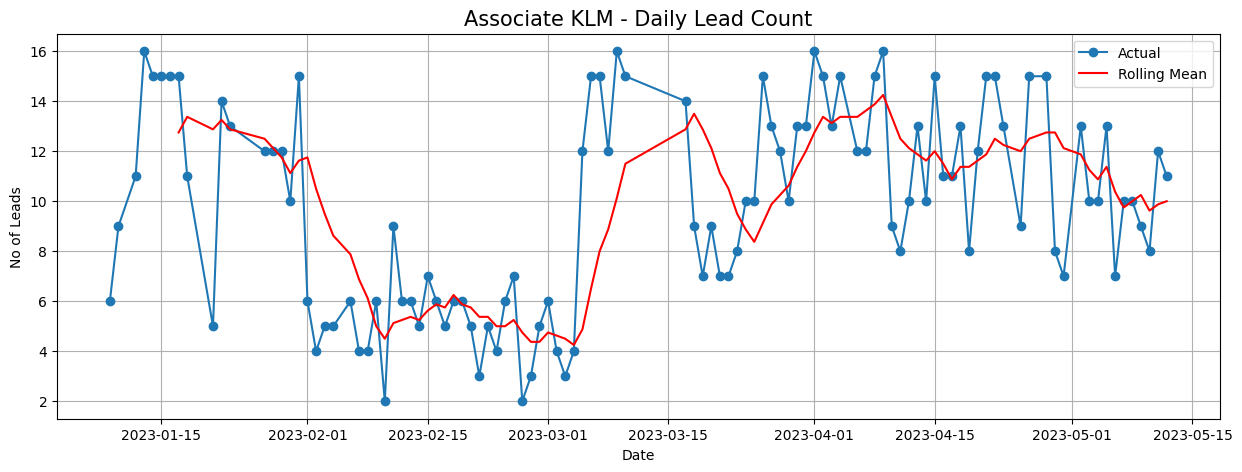

In [39]:

plt.figure(figsize=(15,5))
roll_mean = klm['No of Leads'].rolling(window=8).mean()
plt.plot(klm["No of Leads"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate KLM - Daily Lead Count',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

**Observations:**
- Number of leads generated per day varies significantly, range from 2 to 16. 
**Potential Patterns:**
- Leads tend to drop at the begining of second month and then increase. 
- There was an increase in the number of leads generated during the second month compared to the first month.


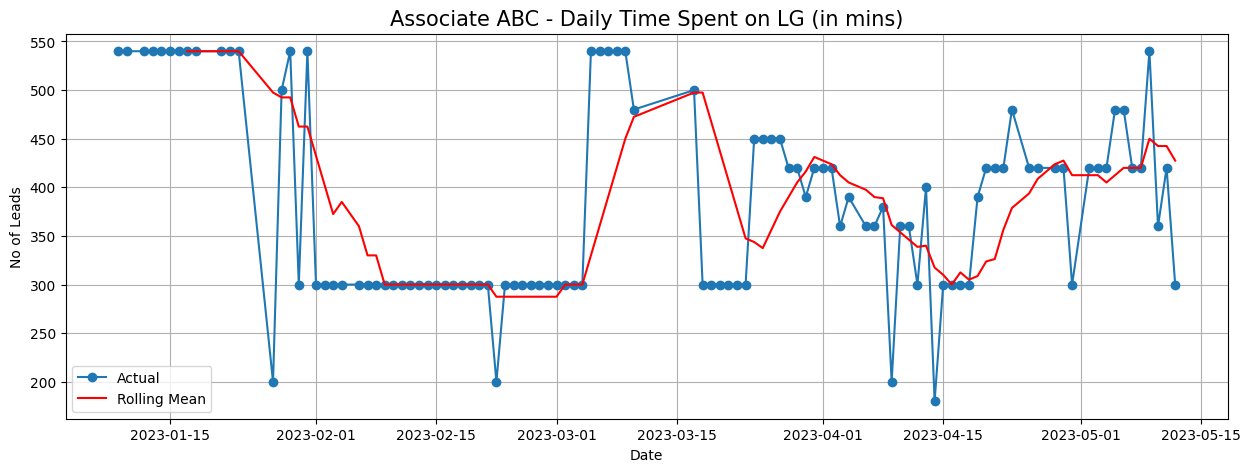

In [40]:
# Time Spent on LG (in mins)
# No of Leads
plt.figure(figsize=(15,5))
roll_mean = klm['Time Spent on LG (in mins)'].rolling(window=8).mean()
plt.plot(klm["Time Spent on LG (in mins)"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate ABC - Daily Time Spent on LG (in mins)',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

##### **Observations:**
- Number of Daily Time Spent on LG (in mins) per day varies significantly, range from 180 to 550.
##### **Potential Patterns:**
- Time spent tend to peak around first-month and drop in begining of second month. 
- There was an decrease in the number of Time Spent during the begining of second month compared to the first month.

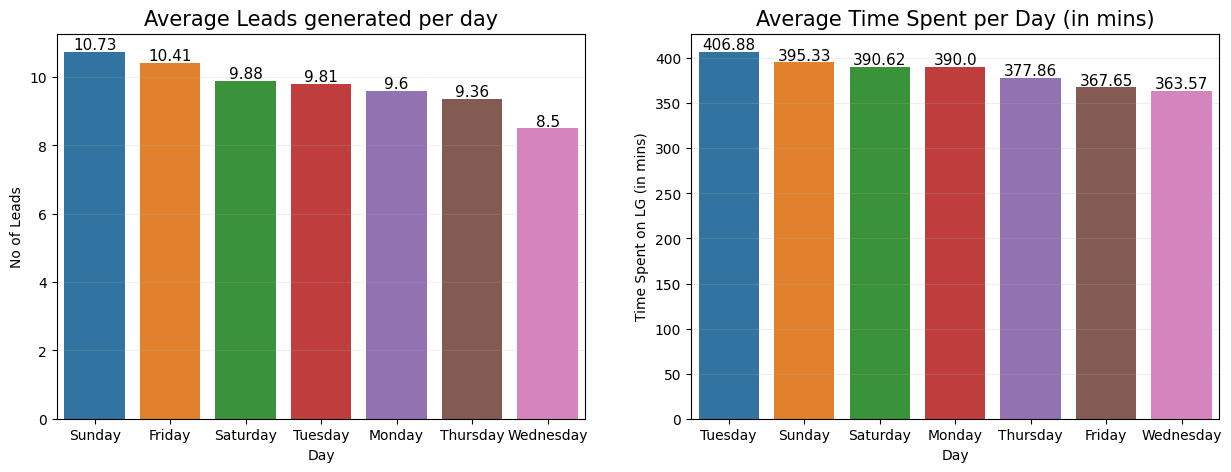

In [41]:
plt.figure(figsize=(15,5))
# Lead Generated
plt.subplot(1,2,1)
avglead=klm.groupby(by="Day",as_index=False)["No of Leads"].mean()
avglead=avglead.sort_values(by="No of Leads",ascending=False)
ax = sns.barplot(y=avglead["No of Leads"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Leads generated per day',fontsize=15)
plt.grid(alpha=0.2,axis="y")
# Time Spent
plt.subplot(1,2,2)
avglead=klm.groupby(by="Day",as_index=False)["Time Spent on LG (in mins)"].mean()
avglead=avglead.sort_values(by="Time Spent on LG (in mins)",ascending=False)
ax = sns.barplot(y=avglead["Time Spent on LG (in mins)"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Time Spent per Day (in mins)',fontsize=15); 
plt.grid(alpha=0.2,axis="y")
plt.show()

##### **Average Leads generated per day**
##### Observations:
- Sunday had the highest average leads generated at approximately 10.73.
- Friday follows closely with an average of approximately 10.41 leads.
- Saturday averaged around 9.88 leads.
- Tuesday and Monday both averaged around 9.81 and 9.6 leads, respectively.
- Thursday had an average of about 9.36 leads.
- Wednesday recorded the lowest average at around 8.5 leads.
##### Potential Patterns and Trends:
- There's a visible pattern where weekends (Sunday and Saturday) have higher average leads compared to weekdays, with Wednesday recording the lowest. This pattern could suggest variations in performance throughout the week, with a notable peak in leads over the weekend.

##### **Average time spent  per day**
##### Observations:
- Tuesday had the highest average time spent, at around 406.88 minutes.
- Sunday followed closely, averaging about 395.33 minutes.
- Saturday averaged around 390.63 minutes, while Monday was close at 390 minutes.
- Thursday averaged around 377.86 minutes.
- Friday recorded an average of approximately 367.65 minutes.
- Wednesday had the lowest average time spent on lead generation, around 363.57 minutes.
##### Potential Patterns and Trends:
- There seems to be a trend where Tuesday stands out with the highest average time spent, while Wednesday records the lowest average time. This pattern suggests fluctuations in time spent on different days, possibly indicating variations in workload or efficiency across the week.

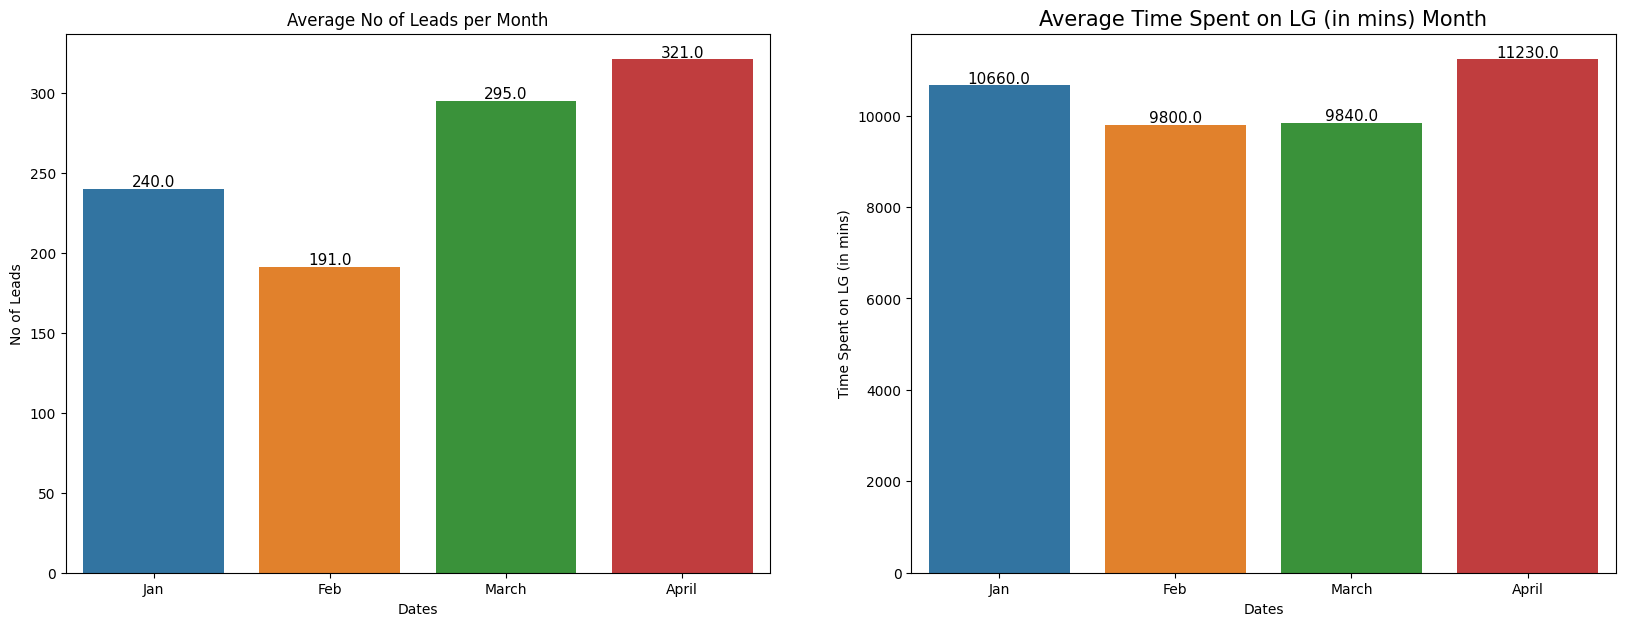

In [42]:

plt.figure(figsize=(20,7))
# Plot1
totmonth1 = klm.loc[:"2023-02-08","No of Leads"].sum()
totmonth2 = klm.loc["2023-02-09":"2023-03-09","No of Leads"].sum()
totmonth3 = klm.loc["2023-03-10":"2023-04-10" ,"No of Leads"].sum()
totmonth4 = klm.loc["2023-04-11":,"No of Leads"].sum()
plt.subplot(1,2,1)
ax = sns.barplot(x=["Jan","Feb","March","April" ],
                 y=[totmonth1,totmonth2,totmonth3,totmonth4])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("No of Leads");plt.title("Average No of Leads per Month")

# Plot2
plt.subplot(1,2,2)
totmonth1 = klm.loc[:"2023-02-08","Time Spent on LG (in mins)"].sum()
totmonth2 = klm.loc["2023-02-09":"2023-03-09","Time Spent on LG (in mins)"].sum()
totmonth3 = klm.loc["2023-03-10":"2023-04-11" ,"Time Spent on LG (in mins)"].sum()
totmonth4 = klm.loc["2023-04-11":,"Time Spent on LG (in mins)"].sum()

ax = sns.barplot(x=["Jan","Feb","March","April" ],
                 y=[totmonth1,totmonth2,totmonth3,totmonth4])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("Time Spent on LG (in mins)");
plt.title("Average Time Spent on LG (in mins) Month",fontsize=15)
plt.show()

#### Observations:
##### Leads Generated: 
- The summary of the trend in the number of leads generated across January, February, March, and April indicates a fluctuating pattern. 
- In January, there were 240 leads, followed by a decline to 191 in February. 
- March showed a significant increase to 295 leads, and April saw a further rise to 321 leads.
- This trend highlights a progressive increase from January to March, signifying a positive growth pattern. 

##### Time Spent: 
- The time spent data across the given period (January, February, March, and April) indicates fluctuations as well. 
- Starting from 10660 minutes in January, there's a slight decrease to 9800 minutes in February. 
- In March, there's a marginal increase to 9840 minutes, and a significant rise is observed in April, reaching 11230 minutes.
- Similar to the trend in leads generated, the time spent also showcases variability. 


### **Associate XYZ**

*Number of Leads Generated Trend and Pattern*

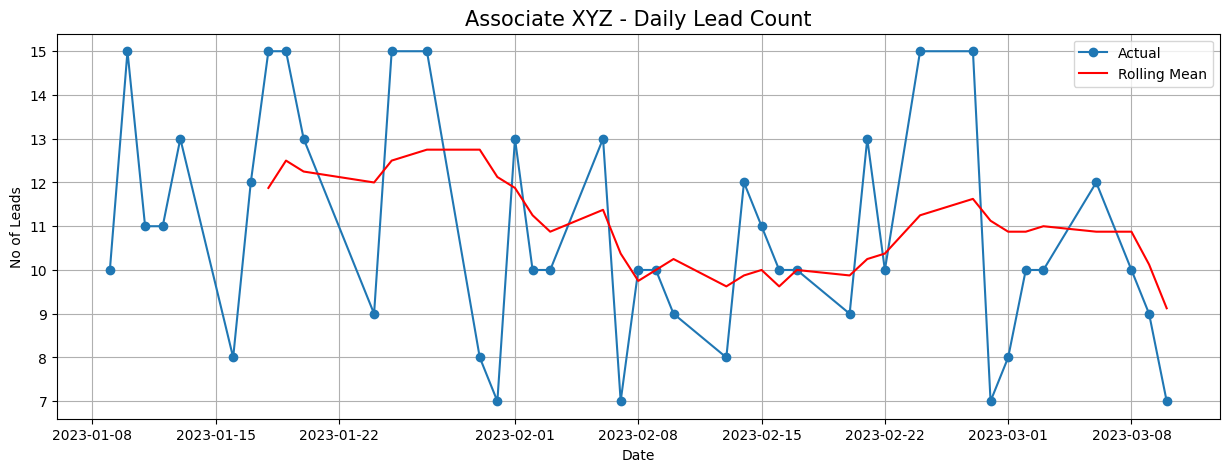

In [43]:

plt.figure(figsize=(15,5))
roll_mean = xyz['No of Leads'].rolling(window=8).mean()
plt.plot(xyz["No of Leads"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate XYZ - Daily Lead Count',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

##### **Observations:**
- Number of leads generated per day varies significantly, range from 7 to 15. 
**Potential Patterns:**
- Leads tend to drop at the begining of second month. 
- There was an decrease in the number of leads generated during the second month compared to the first month.

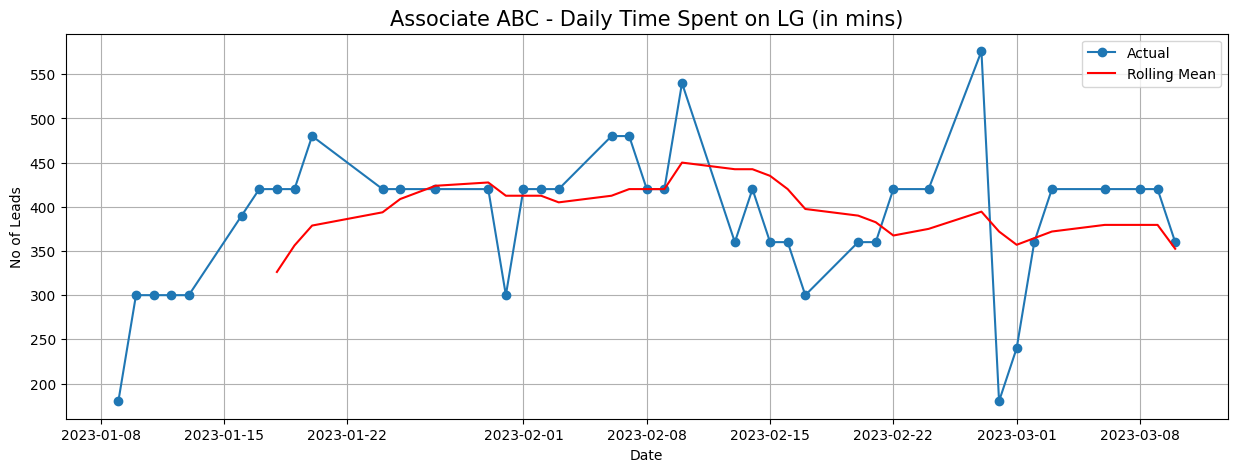

In [44]:
# Time Spent on LG (in mins)
# No of Leads
plt.figure(figsize=(15,5))
roll_mean = xyz['Time Spent on LG (in mins)'].rolling(window=8).mean()
plt.plot(xyz["Time Spent on LG (in mins)"],marker="o")
plt.plot(roll_mean, color='red')
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate ABC - Daily Time Spent on LG (in mins)',fontsize=15) 
plt.legend(['Actual','Rolling Mean'])
plt.grid()
plt.show()

##### **Observations:**
- Number of Daily Time Spent on LG (in mins) per day varies significantly, range from 180 to 550.
##### **Potential Patterns:**
- No Strong Pattern

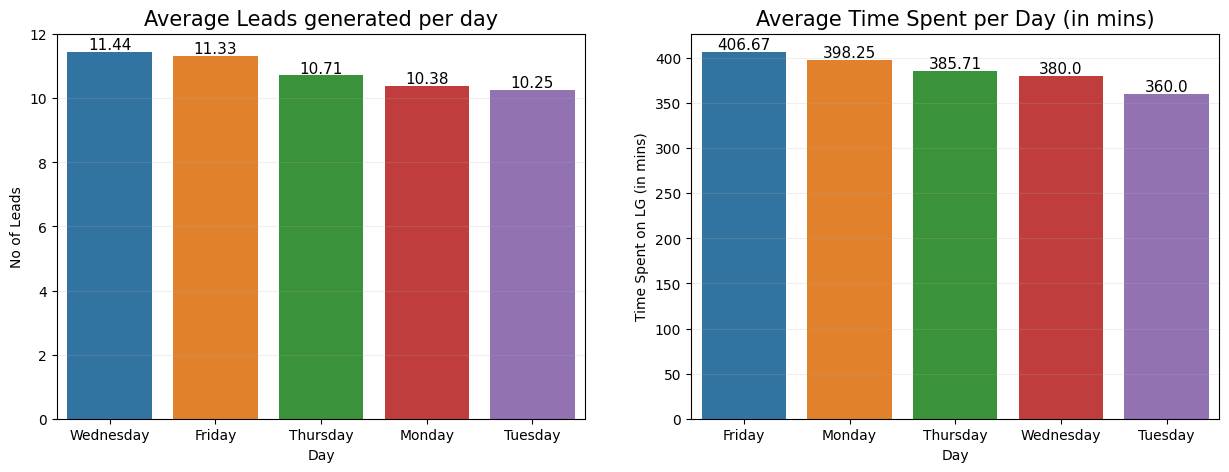

In [45]:
plt.figure(figsize=(15,5))
# Lead Generated
plt.subplot(1,2,1)
avglead=xyz.groupby(by="Day",as_index=False)["No of Leads"].mean()
avglead=avglead.sort_values(by="No of Leads",ascending=False)
ax = sns.barplot(y=avglead["No of Leads"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Leads generated per day',fontsize=15)
plt.grid(alpha=0.2,axis="y")
# Time Spent
plt.subplot(1,2,2)
avglead=xyz.groupby(by="Day",as_index=False)["Time Spent on LG (in mins)"].mean()
avglead=avglead.sort_values(by="Time Spent on LG (in mins)",ascending=False)
ax = sns.barplot(y=avglead["Time Spent on LG (in mins)"],x=avglead["Day"])
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Average Time Spent per Day (in mins)',fontsize=15); 
plt.grid(alpha=0.2,axis="y")
plt.show()

In [46]:
xyz.groupby(by="Day",as_index=False)["Time Spent on LG (in mins)"].mean()

,Day,Time Spent on LG (in mins)
0,Friday,406.666667
1,Monday,398.250000
2,Thursday,385.714286
3,Tuesday,360.000000
4,Wednesday,380.000000


##### **Average Leads generated per day**
##### Observations:
- Sunday: Approximately 10.73 leads on average.
- Friday: Around 10.41 leads on average.
- Saturday: Approximately 9.88 leads on average.
- Tuesday: Approximately 9.81 leads on average.
- Monday: Around 9.6 leads on average.
- Thursday: Approximately 9.36 leads on average.
- Wednesday: Approximately 8.5 leads on average.
##### Potential Patterns and Trends:
- Looking at the data, there seems to be a pattern Sundays and Fridays consistently show higher averages, while Wednesdays consistently record the lowest averages.
- This pattern remains relatively consistent throughout the observed period, indicating a recurring trend in lead generation.

##### **Average time spent  per day**
##### Observations:
- Tuesday: Highest average time spent at around 406.88 minutes.
- Sunday: Close behind with an average of about 395.33 minutes.
- Saturday: Averaged around 390.63 minutes, similar to Monday's 390 minutes.
- Thursday: Averaged approximately 377.86 minutes.
- Friday: Recorded an average of around 367.65 minutes.
- Wednesday: Lowest average time spent on lead generation at approximately 363.57 minutes.
##### Potential Patterns and Trends:
- There's a noticeable pattern in the time spent on different days, with Tuesday consistently recording the highest average time spent. 

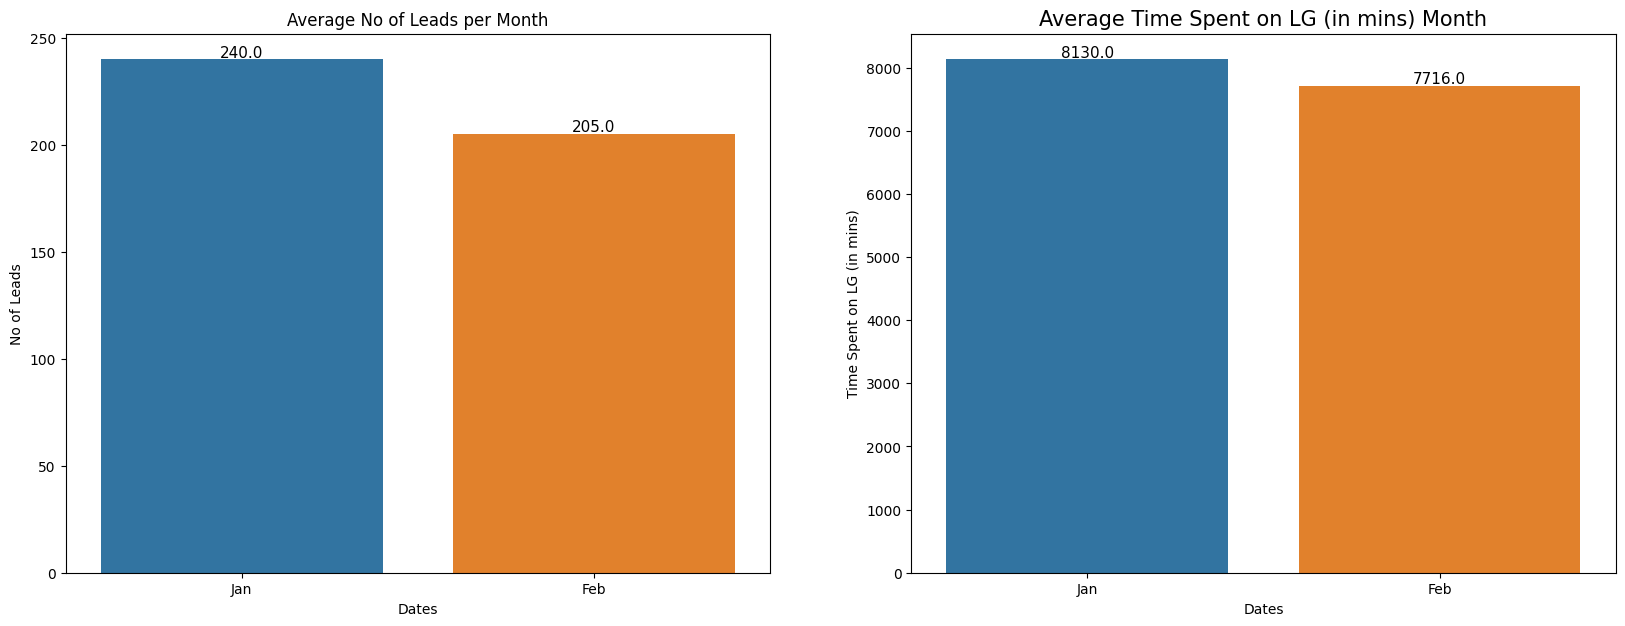

In [47]:

plt.figure(figsize=(20,7))
# Plot1
totmonth1 = xyz.loc[:"2023-02-08","No of Leads"].sum()
totmonth2 = xyz.loc["2023-02-09":,"No of Leads"].sum()
plt.subplot(1,2,1)
ax = sns.barplot(x=["Jan","Feb"],
                 y=[totmonth1,totmonth2])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("No of Leads");plt.title("Average No of Leads per Month")

# Plot2
plt.subplot(1,2,2)
totmonth1 = xyz.loc[:"2023-02-08","Time Spent on LG (in mins)"].sum()
totmonth2 = xyz.loc["2023-02-09":,"Time Spent on LG (in mins)"].sum()
ax = sns.barplot(x=["Jan","Feb" ],
                 y=[totmonth1,totmonth2])
# Add values on top of each bar
for p in ax.patches:
    height = round(p.get_height(), 2)  
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Dates");plt.ylabel("Time Spent on LG (in mins)");
plt.title("Average Time Spent on LG (in mins) Month",fontsize=15)
plt.show()

#### Observations:
##### Total Leads Generated and Time Spent
- January: Recorded the highest leads generated at 240, with a total time spent of 8130 minutes.
- February: Showed a decrease in leads generated, totaling 205, accompanied by a reduction in total time spent to 7716 minutes.
##### Trends and Patterns
- Leads Generated: January observed higher lead generation compared to February, indicating a decline in leads during the second month.
- Time Spent: The total time spent on lead generation also decreased from January to February, aligning with the reduced leads generated, implying a possible correlation between time spent and leads produced.

### Creating tentative projections for Next Month

#### TIME SERIES FORCASTING LEAD GENERATED

C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\abdul\anaconda3\lib\site-packages\statsmode

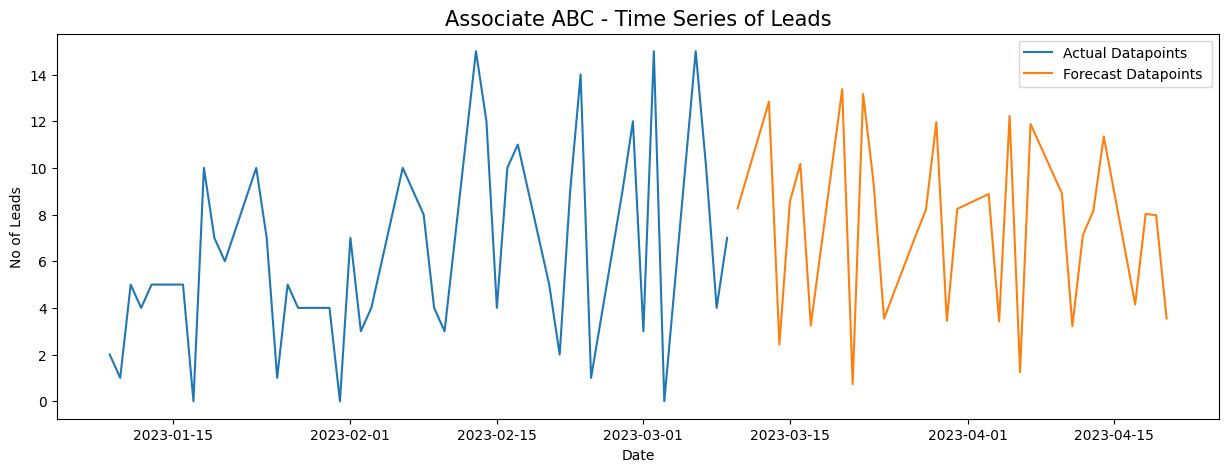

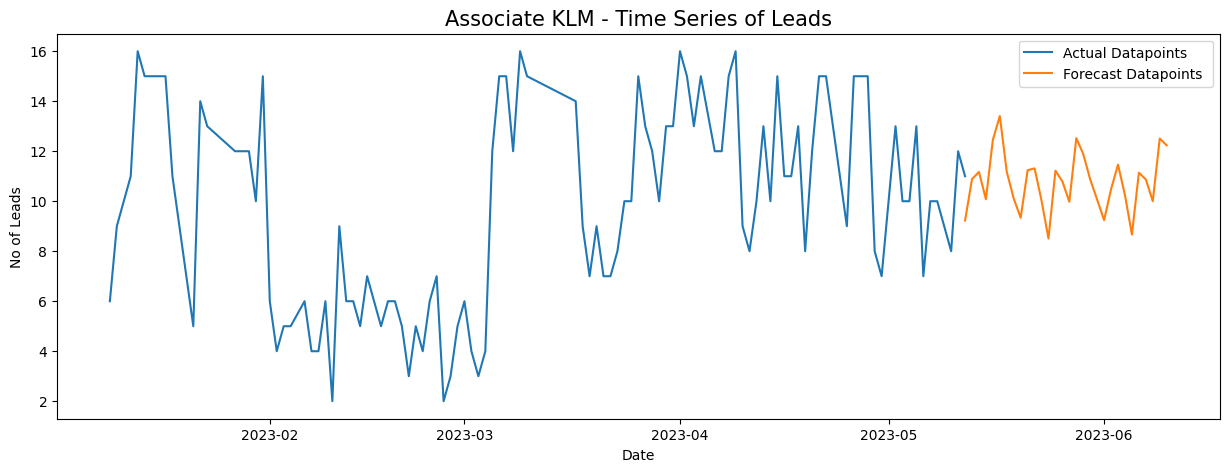

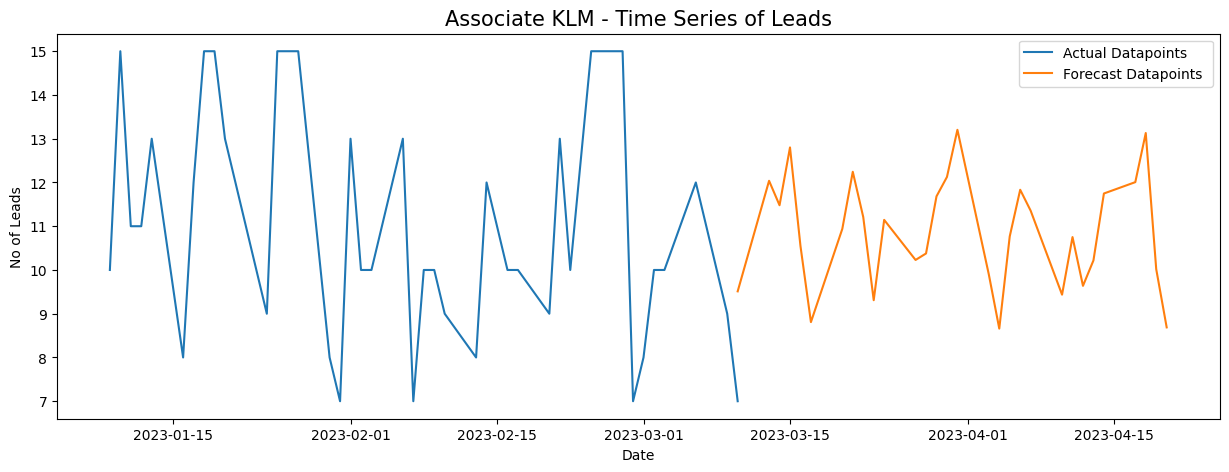

In [48]:
# Train and Fit SARIMA model on abc dataset
abcmodel = SARIMAX(abc['No of Leads'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12),freq="B") 
abcresults = abcmodel.fit()   
# Make predictions
abcforecast = abcresults.get_forecast(steps=30)  # Forecast for next 30 days
abcforecast_values = abcforecast.predicted_mean
abcforcast=pd.DataFrame(abcforecast_values)

# Train and Fit SARIMA model on klm dataset
klmmodel = SARIMAX(klm['No of Leads'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) 
klmresults = klmmodel.fit()
# Make predictions  
klmforecast = klmresults.get_forecast(steps=30)  # Forecast for next 30 days
klmforecast_values = klmforecast.predicted_mean
klmforcastdata=pd.DataFrame(klmforecast_values)
klmforcastdata.index=pd.date_range(start="05/12/2023",periods=30)

# Train and Fit SARIMA model on xyz dataset
xyzmodel = SARIMAX(xyz[['No of Leads']], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) 
xyzresults = xyzmodel.fit()
# # Make predictions
xyzforecast = xyzresults.get_forecast(steps=30)  # Forecast for next 30 days
xyzforecast_values = xyzforecast.predicted_mean
xyzforcastdata = pd.DataFrame(xyzforecast_values)
xyzforcastdata.index =pd.date_range(start="03-10-2023",periods=30,freq="B")
# Visualize the time series
# Associate ABC Plot
plt.figure(figsize=(15, 5))
plt.plot(abc['No of Leads'])
plt.plot(abcforecast_values)
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate ABC - Time Series of Leads',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
# Associate KLM Plot
plt.figure(figsize=(15, 5))
plt.plot(klm['No of Leads'])
plt.plot(klmforcastdata["predicted_mean"])
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate KLM - Time Series of Leads',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
# Associate XYZ Plot
plt.figure(figsize=(15, 5))
plt.plot(xyz['No of Leads'])
plt.plot(xyzforcastdata["predicted_mean"])
plt.xlabel('Date')
plt.ylabel('No of Leads')
plt.title('Associate KLM - Time Series of Leads',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
plt.show()

#### TIME SERIES FORCASTING TIME SPENT

C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\abdul\anaconda3\lib\site-packages\statsmode

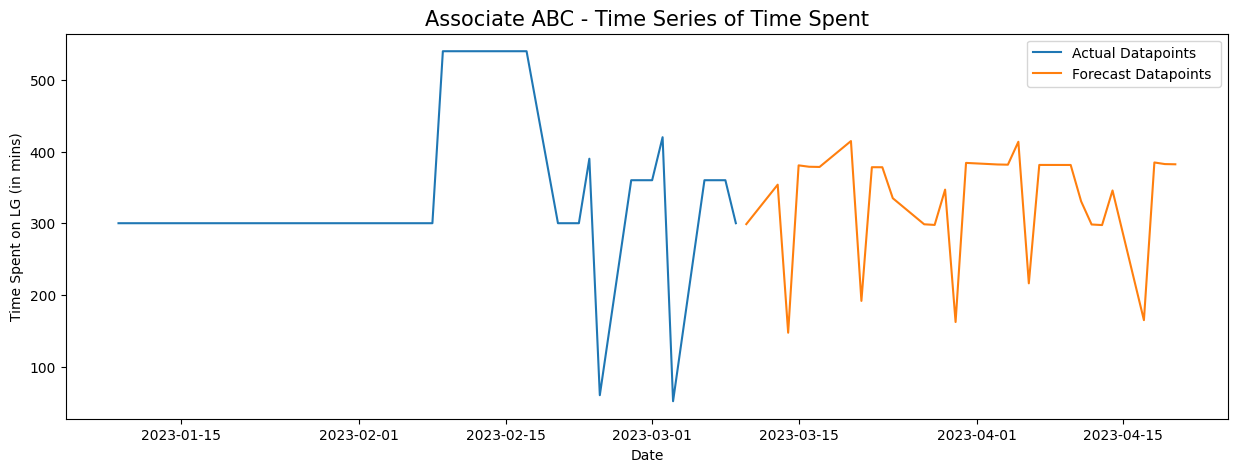

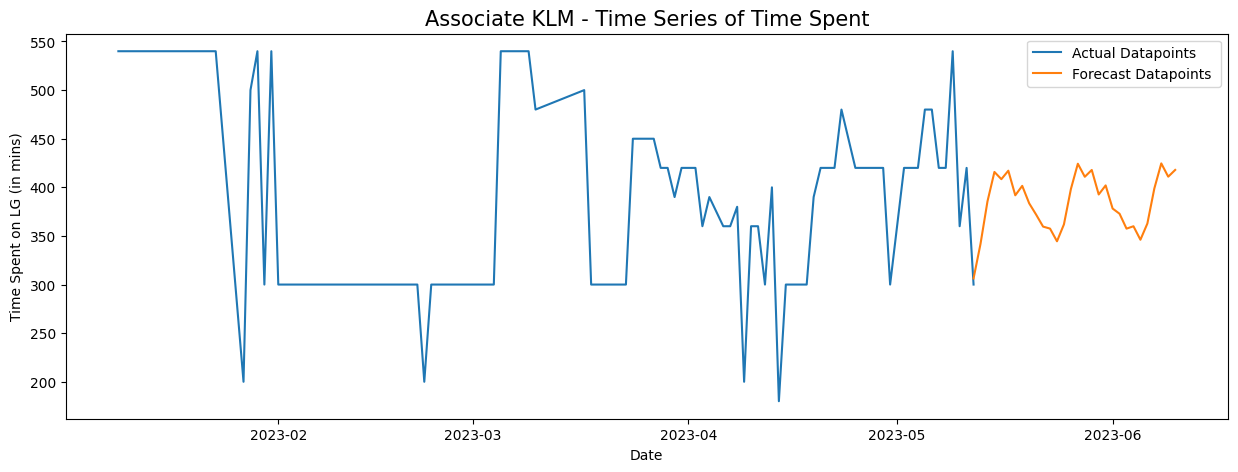

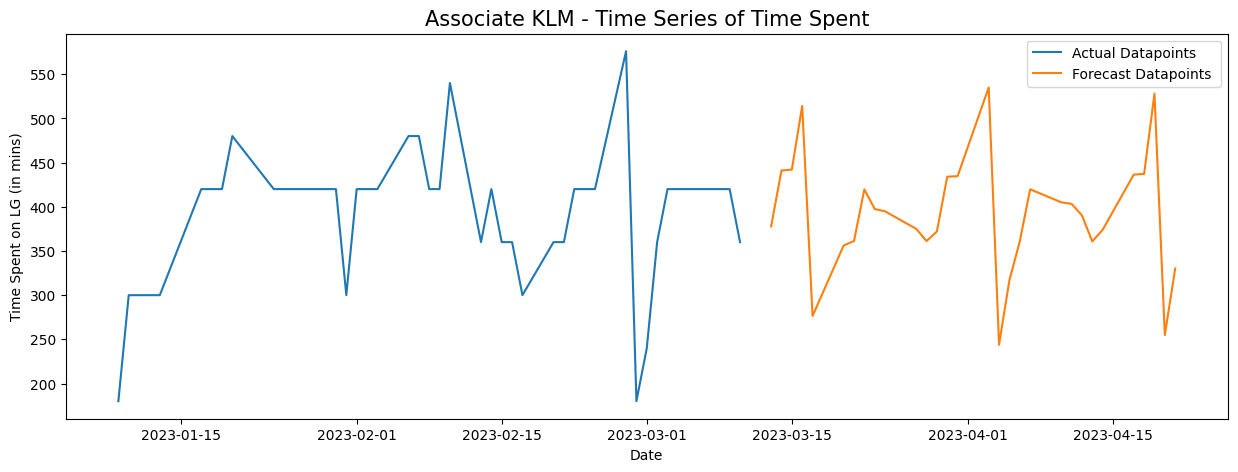

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Train and Fit SARIMA model on abc dataset
abcmodel = SARIMAX(abc['Time Spent on LG (in mins)'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12),freq="B") 
abcresults = abcmodel.fit()   
# Make predictions
abcforecast = abcresults.get_forecast(steps=30)  # Forecast for next 30 days
abcforecast_values = abcforecast.predicted_mean
abcforcast=pd.DataFrame(abcforecast_values)

# Train and Fit SARIMA model on klm dataset
klmmodel = SARIMAX(klm['Time Spent on LG (in mins)'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) 
klmresults = klmmodel.fit()
# Make predictions
klmforecast = klmresults.get_forecast(steps=30)  # Forecast for next 30 days
klmforecast_values = klmforecast.predicted_mean
klmforcastdata=pd.DataFrame(klmforecast_values)
klmforcastdata.index=pd.date_range(start="05/12/2023",periods=30)

# Train and Fit SARIMA model on xyz dataset
xyzmodel = SARIMAX(xyz['Time Spent on LG (in mins)'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) 
xyzresults = xyzmodel.fit()
# # Make predictions
xyzforecast = xyzresults.get_forecast(steps=30)  # Forecast for next 30 days
xyzforecast_values = xyzforecast.predicted_mean
xyzforcastdata = pd.DataFrame(xyzforecast_values)
xyzforcastdata.index =pd.date_range(start="03-11-2023",periods=30,freq="B")
# Visualize the time series
# Associate ABC Plot
plt.figure(figsize=(15, 5))
plt.plot(abc['Time Spent on LG (in mins)'])
plt.plot(abcforecast_values)
plt.xlabel('Date')
plt.ylabel('Time Spent on LG (in mins)')
plt.title('Associate ABC - Time Series of Time Spent',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
# Associate KLM Plot
plt.figure(figsize=(15, 5))
plt.plot(klm['Time Spent on LG (in mins)'])
plt.plot(klmforcastdata["predicted_mean"])
plt.xlabel('Date')
plt.ylabel('Time Spent on LG (in mins)')
plt.title('Associate KLM - Time Series of Time Spent',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
# Associate XYZ Plot
plt.figure(figsize=(15, 5))
plt.plot(xyz['Time Spent on LG (in mins)'])
plt.plot(xyzforcastdata["predicted_mean"])
plt.xlabel('Date')
plt.ylabel('Time Spent on LG (in mins)')
plt.title('Associate KLM - Time Series of Time Spent',fontsize=15)
plt.legend(["Actual Datapoints","Forecast Datapoints "])
plt.show()

### SUMMARY

 ##### **1.What is the total number of leads generated by Each Associate**\
 Associate ABC:
- Total days worked: 44 days
- Total leads generated: 282
- Average leads generated per day: 6.40

 Associate KLM: 
- Total days worked: 107 days
- Total leads generated: 1047
- Average leads generated per day: 9.78

Associate XYZ:
- Total days worked: 41 days   
- Total leads generated: 445
- Average leads generated per day: 10.85

##### **2.What is the total number of leaves taken by each associate (considering Saturday and Sunday as holidays)**

**Associate ABC:**
- Total days: 61 days
- Total days worked: 44 days
- Sundays: 8 leaves
- Saturdays: 8 leaves
- Holidays Personal: 1 leaves
- Total leaves taken: 17

**Associate KLM:**
- Total days: 124 days
- Total days worked: 107 days
- Sundays: 2 leaves
- Saturdays: 1 leaves
- Holidays Personal: 14 leaves
- Total leaves taken: 17

**Associate XYZ:**
- Total days: 61 days
- Total days worked: 41 days  
- Sundays: 8 leaves
- Saturdays: 8 leaves
- Holidays Personal: 4 leaves
- Total leaves taken: 20

##### **3.What is the average number of leads generated by each associate?**

 Associate ABC:
- Total days worked: 44 days
- Total leads generated: 282
- Average leads per day = Total/worked days = 282/44 = 6.40

 Associate KLM: 
- Total days worked: 107 days
- Total leads generated: 1047
- Average per day = 1047/107 = 9.78

Associate XYZ:
- Total days worked: 41 days   
- Total leads generated: 445
- Average per day = 445/41 = 10.85


##### **4.Which associate has been the most consistent in lead generation**
Most consistent associate in lead generation
Standard deviation of daily leads:   
- Associate ABC: 4.27
- Associate KLM : 3.99
- Associate XYZ: 2.55 

Therefore, Associate XYZ has the most consistent leads generated day-to-day with lowest STD of 2.97. 

##### **5.Do you remove missing values from the data-set for analysis? Provide rationale for your answer.**

In this scenario, considering the analysis focuses on evaluating performance during workdays, it might be more appropriate to remove missing values corresponding to Saturdays, Sundays, and days when associates have taken leave. This approach allows the analysis to concentrate on the team's performance during active working days, providing a more targeted and relevant assessment of their productivity and effectiveness.


## Recommendations for Business Development Team:

**1. Boost ABC's Performance:**

* **Targeted training:** Identify and bridge any skill gaps compared to XYZ and KLM.
* **Mentorship:** Pair ABC with top performers for learning best practices.
* **Explore new techniques:** Support ABC in finding their optimal lead generation style.

**2. Share Success:**

* **Knowledge-sharing sessions:** Top performers like XYZ share their strategies with the team.
* **Peer-to-peer feedback:** Constructive feedback on lead generation methods.

**3. Analyze Leave Differences:**

* Understand reasons behind varying leave patterns and address them if impacting performance.

**4. Monitor and Motivate:**

* **Track individual/team performance:** Daily/weekly metrics for targeted interventions.
* **Self-monitoring and goal setting:** Increased ownership and accountability.

**5. Reward and Recognize High Performers:**

* Public acknowledgements and incentives based on lead generation achievements.

**Additional Points:**
* Investigate the lead quality generated by each associate. Are XYZ's leads converting at a higher rate than KLM's or ABC's? Focusing on quality alongside quantity can be crucial.


THANK YOU!

The End...